In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone
sns.set_style("darkgrid")

In [8]:
new_trades =  pd.read_parquet('../tmp/new_fpmmTrades.parquet')

In [9]:
def transform_to_datetime(x):
    return datetime.fromtimestamp(int(x), tz=timezone.utc)


In [10]:
new_trades["creationTimestamp"] = new_trades["creationTimestamp"].apply(
    lambda x: transform_to_datetime(x)
)

In [5]:
new_trades.columns

Index(['collateralAmount', 'collateralAmountUSD', 'collateralToken',
       'creationTimestamp', 'trader_address', 'feeAmount', 'id',
       'oldOutcomeTokenMarginalPrice', 'outcomeIndex',
       'outcomeTokenMarginalPrice', 'outcomeTokensTraded', 'title',
       'transactionHash', 'type', 'market_creator',
       'fpmm.answerFinalizedTimestamp', 'fpmm.arbitrationOccurred',
       'fpmm.currentAnswer', 'fpmm.id', 'fpmm.isPendingArbitration',
       'fpmm.openingTimestamp', 'fpmm.outcomes', 'fpmm.title',
       'fpmm.condition.id'],
      dtype='object')

In [11]:
min(new_trades.creationTimestamp)

Timestamp('2025-01-07 09:01:05+0000', tz='UTC')

In [12]:
all_trades = pd.read_parquet('../data/all_trades_profitability.parquet')

In [13]:
max(all_trades.creation_timestamp)

Timestamp('2025-01-07 04:43:00+0000', tz='UTC')

In [3]:
all_trades.head()

trader_address market_creator  \
0  0x01274796ce41aa8e8312e05a427ffb4b0d2148f6     quickstart   
1  0x01274796ce41aa8e8312e05a427ffb4b0d2148f6     quickstart   
2  0x01274796ce41aa8e8312e05a427ffb4b0d2148f6     quickstart   
3  0x01274796ce41aa8e8312e05a427ffb4b0d2148f6     quickstart   
4  0x01274796ce41aa8e8312e05a427ffb4b0d2148f6     quickstart   

                                            trade_id  \
0  0x0dfb9821725003c4d3007999968d34d7070959ef0x01...   
1  0x1082be4e429e512182089162f41b3a86a52eee370x01...   
2  0x150f4d4e5affa7fe332684d7c828c0a471c4d5de0x01...   
3  0x15edf592dc3eb67e1c163ceb6d23039710cd67fb0x01...   
4  0x187c822a330c393912398884faf8150d21b4a7840x01...   

         creation_timestamp  \
0 2024-10-27 21:51:25+00:00   
1 2024-10-31 22:50:15+00:00   
2 2024-10-29 02:21:25+00:00   
3 2024-10-28 21:59:25+00:00   
4 2024-10-30 00:30:45+00:00   

                                               title market_status  \
0  Will any mainstream U.S. news outlet publish a...        CLOSED   
1  Will Prime Minister Shigeru Ishiba announce a ...        CLOSED   
2  Will the Constitutional Democratic Party of Ja...        CLOSED   
3  Will there be a public statement from the Bide...        CLOSED   
4  Will the Bank of Japan issue a public statemen...        CLOSED   

   collateral_amount outcome_index  trade_fee_amount  outcomes_tokens_traded  \
0           0.461993             1          0.004620                0.734537   
1           0.859939             0          0.008599                2.714890   
2           0.203751             1          0.002038                0.305174   
3           0.412054             1          0.004121                0.666936   
4           0.333192             0          0.003332                0.447445   

   ...  winning_trade  earnings  redeemed  redeemed_amount  num_mech_calls  \
0  ...           True  0.734537      True         0.734537             2.0   
1  ...          False  0.000000     False         0.000000             8.0   
2  ...           True  0.305174      True         0.305174             2.0   
3  ...          False  0.000000     False         0.000000             2.0   
4  ...           True  0.447445      True         0.447445             8.0   

   mech_fee_amount  net_earnings       roi      staking  nr_mech_calls  
0             0.02      0.247924  0.509488  non_staking            NaN  
1             0.08     -0.948538 -1.000000  non_staking            NaN  
2             0.02      0.079385  0.351592  non_staking            NaN  
3             0.02     -0.436175 -1.000000  non_staking            NaN  
4             0.08      0.030922  0.074237  non_staking            NaN  

[5 rows x 22 columns]

In [4]:
all_trades.num_mech_calls.describe()

count    43987.000000
mean         6.663537
std         13.608287
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max        650.000000
Name: num_mech_calls, dtype: float64

In [4]:
all_trades.staking.value_counts()

staking
quickstart     18996
non_staking     8360
non_agent       7249
pearl           2679
Name: count, dtype: int64

In [29]:
all_trades.num_mech_calls.describe()

count    26797.000000
mean         4.126320
std          4.063486
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         65.000000
Name: num_mech_calls, dtype: float64

In [7]:
all_trades['creation_timestamp'] = pd.to_datetime(all_trades['creation_timestamp'])
all_trades['creation_date'] = all_trades['creation_timestamp'].dt.date
all_trades['creation_time'] = all_trades['creation_timestamp'].dt.time

In [10]:
daily_mech_calls = all_trades.groupby(["market_creator", "trader_address","creation_date"]).agg(mean=("num_mech_calls", 'mean'), max=("num_mech_calls", 'max'), min=("num_mech_calls", 'min'), nr_trades=("num_mech_calls", 'count')).reset_index()

In [11]:
daily_mech_calls.head()

market_creator                              trader_address creation_date  \
0          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2    2024-09-16   
1          pearl  0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0    2024-10-15   
2          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-08-23   
3          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-10-04   
4          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-10-06   

       mean  max  min  nr_trades  
0  2.000000    2    2          1  
1  2.000000    2    2          1  
2  2.000000    2    2          1  
3  2.000000    2    2          1  
4  3.454545    5    2         11

<Axes: xlabel='creation_date', ylabel='mean'>

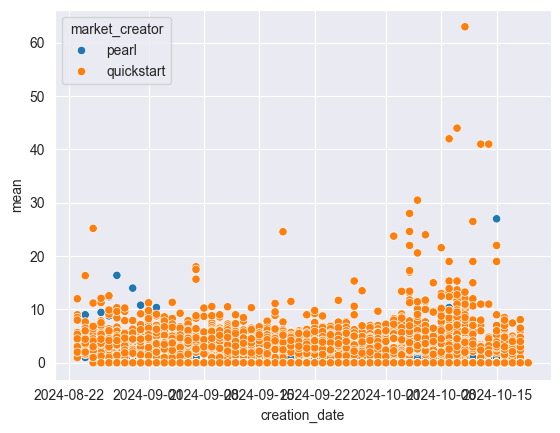

In [12]:
sns.scatterplot(daily_mech_calls, x="creation_date", y="mean", hue="market_creator")

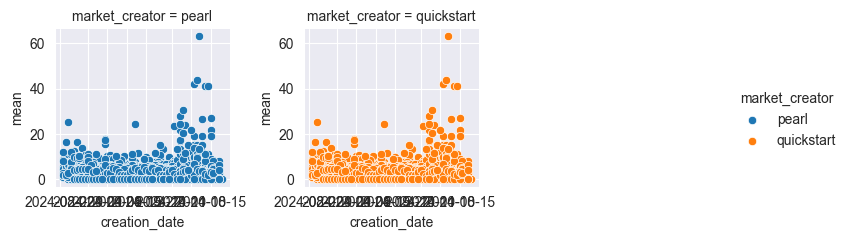

In [15]:
g = sns.FacetGrid(daily_mech_calls, col="market_creator", hue="market_creator", col_wrap=3, height=2.5, sharey=False)
g.map(sns.scatterplot, data= daily_mech_calls, x="creation_date", y="mean")
g.add_legend()

In [17]:
daily_ratio_mech_calls = all_trades.groupby(["market_creator", "trader_address","creation_date"]).agg(total_mech_calls=("num_mech_calls", 'sum'), total_trades=("num_mech_calls", 'count')).reset_index()

In [18]:
ratio_mech_calls = all_trades.groupby(["market_creator", "trader_address"]).agg(total_mech_calls=("num_mech_calls", 'sum'), total_trades=("num_mech_calls", 'count')).reset_index()

In [19]:
daily_ratio_mech_calls["mech_calls_ratio"] = daily_ratio_mech_calls["total_mech_calls"]/daily_ratio_mech_calls["total_trades"]
ratio_mech_calls["mech_calls_ratio"] = ratio_mech_calls["total_mech_calls"]/ratio_mech_calls["total_trades"]

In [20]:
daily_ratio_mech_calls.head()

market_creator                              trader_address creation_date  \
0          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2    2024-09-16   
1          pearl  0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0    2024-10-15   
2          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-08-23   
3          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-10-04   
4          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-10-06   

   total_mech_calls  total_trades  mech_calls_ratio  
0                 2             1          2.000000  
1                 2             1          2.000000  
2                 2             1          2.000000  
3                 2             1          2.000000  
4                38            11          3.454545

In [21]:
ratio_mech_calls.head()

market_creator                              trader_address  \
0          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2   
1          pearl  0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0   
2          pearl  0x032533005f65026fa7f360ff9a211bc94315325d   
3          pearl  0x03429c1ab7d9d14baa42ded8a2dd7d684fc950ed   
4          pearl  0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736   

   total_mech_calls  total_trades  mech_calls_ratio  
0                 2             1               2.0  
1                 2             1               2.0  
2                96            30               3.2  
3                 2             2               1.0  
4                 0           114               0.0

Text(0.5, 1.0, 'Distribution of total ratio = total_nr_mech_calls/total_trades at the trader level')

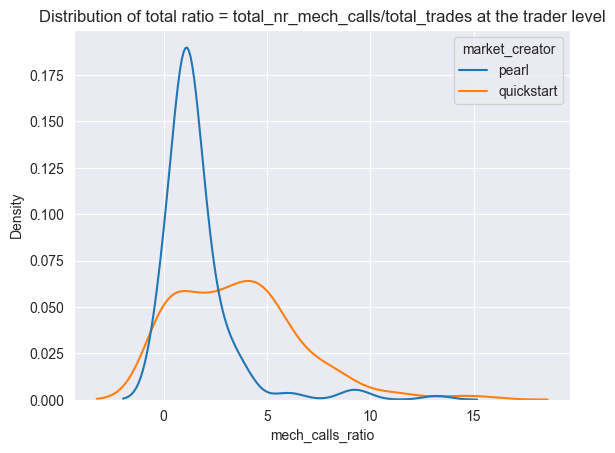

In [23]:
sns.kdeplot(ratio_mech_calls, x="mech_calls_ratio", hue="market_creator")
plt.title('Distribution of total ratio = total_nr_mech_calls/total_trades at the trader level')

Text(0.5, 1.0, 'Distribution of daily ratio = total_daily_nr_mech_calls/total_daily_trades at the trader level')

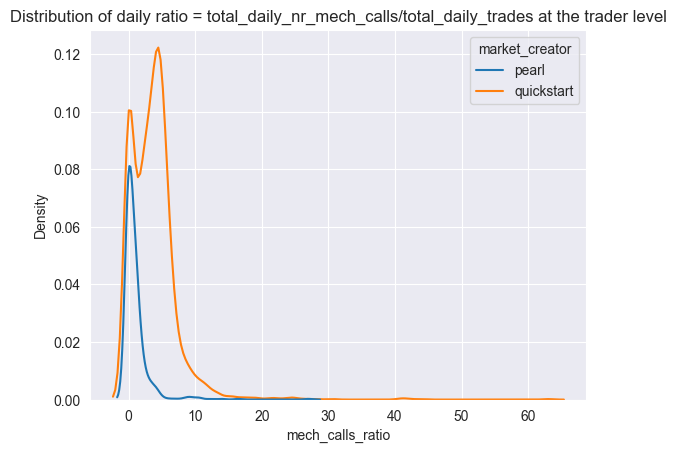

In [24]:
sns.kdeplot(daily_ratio_mech_calls, x="mech_calls_ratio", hue="market_creator")
plt.title('Distribution of daily ratio = total_daily_nr_mech_calls/total_daily_trades at the trader level')

In [25]:
ratio_mech_calls.mech_calls_ratio.describe()

count    311.000000
mean       2.601484
std        2.648168
min        0.000000
25%        1.000000
50%        1.666667
75%        3.899545
max       15.344262
Name: mech_calls_ratio, dtype: float64

Text(0.5, 1.0, 'Histogram of total ratio = total_nr_mech_calls/total_trades at the trader level')

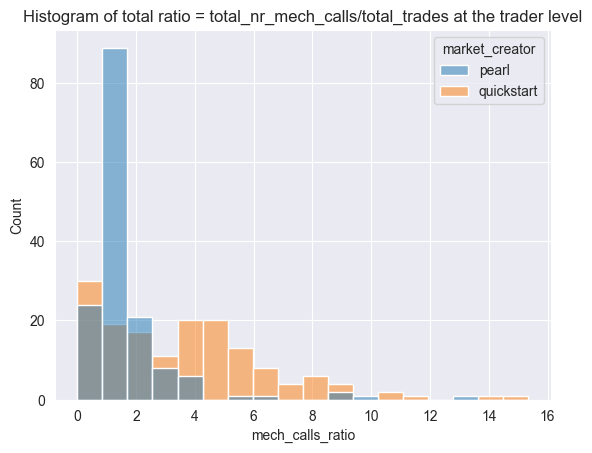

In [26]:
sns.histplot(ratio_mech_calls, x="mech_calls_ratio", hue="market_creator")
plt.title('Histogram of total ratio = total_nr_mech_calls/total_trades at the trader level')

In [27]:
ratio_mech_calls.groupby('market_creator')['mech_calls_ratio'].describe()

count      mean       std  min      25%  50%       75%  \
market_creator                                                           
pearl           154.0  1.592610  1.792455  0.0  1.00000  1.0  2.000000   
quickstart      157.0  3.591079  2.965505  0.0  1.09375  3.5  5.117788   

                      max  
market_creator             
pearl           13.202703  
quickstart      15.344262

In [30]:
all_trades.groupby('market_creator')['num_mech_calls'].describe()

count      mean       std  min  25%  50%  75%   max
market_creator                                                       
pearl            1295.0  1.818533  3.947135  0.0  0.0  0.0  1.0  27.0
quickstart      25502.0  4.243510  4.034311  0.0  2.0  4.0  6.0  65.0

## Analysis taking into account all mech calls

In [102]:
tools = pd.read_parquet("../data/tools.parquet")

In [31]:
tools = pd.read_parquet("../data/tools.parquet")
trades = pd.read_parquet("../data/fpmmTrades.parquet")

In [32]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29593 entries, 0 to 29592
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   collateralAmount               29593 non-null  object
 1   collateralAmountUSD            29593 non-null  object
 2   collateralToken                29593 non-null  object
 3   creationTimestamp              29593 non-null  object
 4   trader_address                 29593 non-null  object
 5   feeAmount                      29593 non-null  object
 6   id                             29593 non-null  object
 7   oldOutcomeTokenMarginalPrice   29593 non-null  object
 8   outcomeIndex                   29593 non-null  object
 9   outcomeTokenMarginalPrice      29593 non-null  object
 10  outcomeTokensTraded            29593 non-null  object
 11  title                          29593 non-null  object
 12  transactionHash                29593 non-null  object
 13  t

In [34]:
trades_per_trader = trades.groupby(["market_creator", "trader_address"]).agg(total_trades=("title","count")).reset_index()

In [35]:
trades_per_trader.head()

market_creator                              trader_address  total_trades
0          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2             2
1          pearl  0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0             1
2          pearl  0x032533005f65026fa7f360ff9a211bc94315325d            47
3          pearl  0x03429c1ab7d9d14baa42ded8a2dd7d684fc950ed             2
4          pearl  0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736           132

In [51]:
trades_per_trader.groupby('market_creator')['total_trades'].describe()

count        mean         std  min   25%   50%    75%     max
market_creator                                                               
pearl           162.0    9.222222   25.013537  1.0   1.0   2.0    4.0   202.0
quickstart      173.0  162.421965  234.143345  1.0  18.0  56.0  213.0  1095.0

In [36]:
tools.head()

request_id request_block  \
0  2225618424541398419933635980124149566532513522...      35791858   
1  1148749493371728409514710538112897053025639675...      36588666   
2  1011880839868261161033272472370322925264448801...      35667678   
3  1152862668912527760950055055523417275018202992...      36086142   
4  3074222847102674989172916916176718419667980583...      35854248   

                                      prompt_request  \
0  Please take over the role of a Data Scientist ...   
1  Please take over the role of a Data Scientist ...   
2  Please take over the role of a Data Scientist ...   
3  Please take over the role of a Data Scientist ...   
4  Please take over the role of a Data Scientist ...   

                           tool                                 nonce  \
0            prediction-offline  ab641d61-9f86-4259-a6c9-29fb94dbbd5f   
1      claude-prediction-online  940bdc48-050a-41be-809c-0cc079c5a4e2   
2  prediction-request-reasoning  8974731b-93bf-46eb-b7d7-7c3d6fae3a1b   
3        prediction-offline-sme  da8080f9-c92d-4cf9-9387-71974bef548d   
4            prediction-offline  99749c5f-325d-4aca-b4ec-ed4227777020   

                               trader_address deliver_block  error  \
0  0x9694c0fdb79a37d048ea19deb15e051482a690c4      35791862      0   
1  0xbb9ee65ce6646a6b1d6a2511b72343a7e3d355af      36588672      0   
2  0x246f6787c409dd5139b7029cd63b7d6aad08cc61      35667695      0   
3  0x3badd0a1beb34fc1532f6c717fa857b3325da184      36086168      0   
4  0x9d8337b10c7b820e44ae3273dab47220ea41bfc9      35854264      0   

  error_message                                    prompt_response  ...  \
0          None  \nYou are an LLM inside a multi-agent system t...  ...   
1          None  \nYou are an LLM inside a multi-agent system t...  ...   
2          None  \nHere is the user's question: Will Hurricane ...  ...   
3          None  \nYou are an LLM inside a multi-agent system t...  ...   
4          None  \nYou are an LLM inside a multi-agent system t...  ...   

  confidence  info_utility  vote  win_probability  market_creator  \
0        0.1           0.0  None             0.50      quickstart   
1        0.2           0.1  None             0.50      quickstart   
2        0.6           0.7    No             0.60      quickstart   
3        0.6           0.0    No             0.55           pearl   
4        0.1           0.0  None             0.50      quickstart   

                                               title  currentAnswer  \
0  Will Iceland's cucumber supply return to norma...            Yes   
1  Will Pakistan take a first-innings lead of ove...           None   
2   Will Hurricane Gilma hit land by 29 August 2024?             No   
3  Will Manchester City be found guilty of the 11...             No   
4  Will Lenovo release the new Copilot Plus PCs o...             No   

          request_time request_month_year request_month_year_week  
0  2024-09-02 08:19:30            2024-09   2024-09-02/2024-09-08  
1  2024-10-19 19:15:40            2024-10   2024-10-14/2024-10-20  
2  2024-08-25 22:00:15            2024-08   2024-08-19/2024-08-25  
3  2024-09-19 20:00:45            2024-09   2024-09-16/2024-09-22  
4  2024-09-06 01:36:35            2024-09   2024-09-02/2024-09-08  

[5 rows x 23 columns]

In [37]:
tools.iloc[0].prompt_request

'Please take over the role of a Data Scientist to evaluate the given question. With the given question "Will Iceland\'s cucumber supply return to normal by September 3, 2024?" and the `yes` option represented by `Yes` and the `no` option represented by `No`, what are the respective probabilities of `p_yes` and `p_no` occurring?'

In [38]:
import re

def extract_title(text: str) -> str:
    question = re.search('"([^"]+)"', text).group(1)
    return question

In [39]:
tools["title"] = tools.apply(lambda x: extract_title(x.prompt_request), axis=1)

In [40]:
tools.iloc[0].title

"Will Iceland's cucumber supply return to normal by September 3, 2024?"

In [42]:
def get_nr_mech_calls(prompt_request, title) -> int:
    print("prompt_request")
    print("title")
    count = prompt_request.lower().count(title.lower())
    return count

In [43]:
tools["num_mech_calls"] = tools.apply(lambda x: get_nr_mech_calls(x.prompt_request, x.title), axis=1)

In [44]:
tools.iloc[0].num_mech_calls

1

In [45]:
tools.num_mech_calls.describe()

count    162131.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: num_mech_calls, dtype: float64

So each row is a single mech request

In [46]:
mech_calls_per_trader = tools.groupby(["market_creator", "trader_address"]).agg(total_mech_calls=("title","count")).reset_index()

In [47]:
mech_calls_per_trader.head()

market_creator                              trader_address  total_mech_calls
0          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2               282
1          pearl  0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0               142
2          pearl  0x032533005f65026fa7f360ff9a211bc94315325d               223
3          pearl  0x03429c1ab7d9d14baa42ded8a2dd7d684fc950ed               140
4          pearl  0x04430ebfb7d088960233b7353cb4cefb528dc31e               305

In [50]:
mech_calls_per_trader.groupby('market_creator')['total_mech_calls'].describe()

count        mean         std  min    25%    50%     75%  \
market_creator                                                             
pearl           137.0  229.386861  167.584932  5.0  132.0  189.0   280.0   
quickstart      140.0  933.607143  926.353062  5.0  122.0  553.0  1703.0   

                   max  
market_creator          
pearl           1037.0  
quickstart      4315.0

In [49]:
final_data = pd.merge(trades_per_trader, mech_calls_per_trader, on=['trader_address', 'market_creator'])
final_data.head()


market_creator                              trader_address  total_trades  \
0          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2             2   
1          pearl  0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0             1   
2          pearl  0x032533005f65026fa7f360ff9a211bc94315325d            47   
3          pearl  0x03429c1ab7d9d14baa42ded8a2dd7d684fc950ed             2   
4          pearl  0x04430ebfb7d088960233b7353cb4cefb528dc31e            40   

   total_mech_calls  
0               282  
1               142  
2               223  
3               140  
4               305

In [52]:
final_data["ratio_mech_calls"] = final_data["total_mech_calls"]/final_data["total_trades"]

In [53]:
final_data.groupby('market_creator')['ratio_mech_calls'].describe()

count        mean         std      min       25%        50%  \
market_creator                                                                
pearl           137.0  112.477637  118.879586  2.50000  50.25000  89.000000   
quickstart      140.0   13.269699   52.727037  1.83707   3.81075   5.598246   

                       75%     max  
market_creator                      
pearl           150.500000  1037.0  
quickstart        9.452414   618.0

## Time analysis

In [56]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29593 entries, 0 to 29592
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   collateralAmount               29593 non-null  object
 1   collateralAmountUSD            29593 non-null  object
 2   collateralToken                29593 non-null  object
 3   creationTimestamp              29593 non-null  object
 4   trader_address                 29593 non-null  object
 5   feeAmount                      29593 non-null  object
 6   id                             29593 non-null  object
 7   oldOutcomeTokenMarginalPrice   29593 non-null  object
 8   outcomeIndex                   29593 non-null  object
 9   outcomeTokenMarginalPrice      29593 non-null  object
 10  outcomeTokensTraded            29593 non-null  object
 11  title                          29593 non-null  object
 12  transactionHash                29593 non-null  object
 13  t

In [58]:
import datetime
trades["creation_timestamp"] = trades.apply(lambda x: datetime.datetime.fromtimestamp(
                int(x["creationTimestamp"]), tz=datetime.timezone.utc
            ), axis=1)

In [60]:
trades['creation_timestamp'] = pd.to_datetime(trades['creation_timestamp'])
trades['creation_date'] = trades['creation_timestamp'].dt.date
trades['creation_time'] = trades['creation_timestamp'].dt.time

In [94]:
trades["creation_timestamp"] = pd.to_datetime(trades["creation_timestamp"])
trades["creation_timestamp"] = trades["creation_timestamp"].dt.tz_convert(
        "UTC"
    )
trades = trades.sort_values(by="creation_timestamp", ascending=True)
trades["month_year"] = (
        trades["creation_timestamp"].dt.to_period("M").astype(str)
    )
trades["month_year_week"] = (
        trades["creation_timestamp"].dt.to_period("W").dt.strftime("%b-%d")
    )

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_15601/3921345989.py:7: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_15601/3921345989.py:10: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [63]:
daily_trades_per_trader = trades.groupby(["market_creator", "trader_address","creation_date"]).agg(total_trades=("title","count")).reset_index()

In [121]:
weekly_trades_per_trader = trades.groupby(["market_creator", "trader_address","month_year_week"], sort=False).agg(total_trades=("title","count")).reset_index()

In [140]:
weekly_total_trades_stats = weekly_trades_per_trader.groupby(["market_creator","month_year_week"], sort=False).agg(mean=("total_trades", 'mean'),median=("total_trades", 'median'), max=("total_trades", 'max'), min=("total_trades", 'min'), count=("total_trades", 'count')).reset_index()

In [141]:
weekly_total_trades_stats.head()

market_creator month_year_week       mean  median  max  min  count
0     quickstart          Aug-25  14.069767    11.0   34    1     43
1          pearl          Aug-25   3.000000     3.0    8    1      7
2     quickstart          Sep-01  50.186667    39.0  193    2     75
3          pearl          Sep-01  11.000000     4.0   89    1     25
4     quickstart          Sep-08  45.714286    37.0  144    1     77

In [64]:
daily_trades_per_trader.head()

market_creator                              trader_address creation_date  \
0          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2    2024-09-01   
1          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2    2024-09-16   
2          pearl  0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0    2024-10-15   
3          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-08-23   
4          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-10-04   

   total_trades  
0             1  
1             1  
2             1  
3             1  
4             1

In [65]:
daily_trades_per_trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   market_creator  3262 non-null   object
 1   trader_address  3262 non-null   object
 2   creation_date   3262 non-null   object
 3   total_trades    3262 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [76]:
daily_trades_per_trader["day_id"] =  daily_trades_per_trader["creation_date"].astype('category')
daily_trades_per_trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   market_creator  3262 non-null   object  
 1   trader_address  3262 non-null   object  
 2   creation_date   3262 non-null   object  
 3   total_trades    3262 non-null   int64   
 4   day_id          3262 non-null   category
dtypes: category(1), int64(1), object(3)
memory usage: 107.8+ KB


In [77]:
daily_trades_per_trader.head()

market_creator                              trader_address creation_date  \
0          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2    2024-09-01   
1          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2    2024-09-16   
2          pearl  0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0    2024-10-15   
3          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-08-23   
4          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-10-04   

   total_trades      day_id  
0             1  2024-09-01  
1             1  2024-09-16  
2             1  2024-10-15  
3             1  2024-08-23  
4             1  2024-10-04

In [62]:
import plotly.express as px

In [147]:
daily_trades_per_trader.groupby('market_creator')['total_trades'].describe()

count       mean       std  min  25%  50%   75%   max
market_creator                                                        
pearl            623.0   2.398074  2.834468  1.0  1.0  1.0   3.0  33.0
quickstart      2639.0  10.647594  8.860392  1.0  4.0  8.0  15.0  74.0

In [73]:
fig = px.scatter(daily_trades_per_trader.loc[daily_trades_per_trader["market_creator"]=="pearl"], x="creation_date", y="total_trades", title='Daily total_trades by pearl markets')
fig.show()

In [74]:
fig = px.scatter(daily_trades_per_trader.loc[daily_trades_per_trader["market_creator"]!="pearl"], x="creation_date", y="total_trades", color="market_creator", title='Daily total_trades by qs markets')
fig.show()

In [91]:
daily_trades_per_trader.groupby('market_creator')['total_trades'].describe()

count       mean       std  min  25%  50%   75%   max
market_creator                                                        
pearl            623.0   2.398074  2.834468  1.0  1.0  1.0   3.0  33.0
quickstart      2639.0  10.647594  8.860392  1.0  4.0  8.0  15.0  74.0

In [103]:
tools['request_time'] = pd.to_datetime(tools['request_time'])
tools['request_date'] = tools['request_time'].dt.date

In [104]:
tools = tools.sort_values(by="request_time", ascending=True)
tools["month_year"] = (
        tools["request_time"].dt.to_period("M").astype(str)
    )
tools["month_year_week"] = (
        tools["request_time"].dt.to_period("W").dt.strftime("%b-%d")
    )

In [82]:
daily_mech_calls_per_trader = tools.groupby(["market_creator", "trader_address","request_date"]).agg(total_mech_calls=("title","count")).reset_index()

In [122]:
weekly_mech_calls_per_trader = tools.groupby(["market_creator", "trader_address","month_year_week"], sort=False).agg(total_mech_calls=("title","count")).reset_index()

In [83]:
daily_final_data = pd.merge(daily_trades_per_trader, daily_mech_calls_per_trader, left_on=['trader_address', 'market_creator', "creation_date"], right_on=['trader_address', 'market_creator', "request_date"])
daily_final_data.head()

market_creator                              trader_address creation_date  \
0          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2    2024-09-01   
1          pearl  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2    2024-09-16   
2          pearl  0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0    2024-10-15   
3          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-08-23   
4          pearl  0x032533005f65026fa7f360ff9a211bc94315325d    2024-10-04   

   total_trades      day_id request_date  total_mech_calls  
0             1  2024-09-01   2024-09-01                 6  
1             1  2024-09-16   2024-09-16                12  
2             1  2024-10-15   2024-10-15                 5  
3             1  2024-08-23   2024-08-23                20  
4             1  2024-10-04   2024-10-04                11

In [84]:
daily_final_data["daily_ratio_mech_calls"] = daily_final_data["total_mech_calls"]/daily_final_data["total_trades"]

In [86]:
fig = px.scatter(daily_final_data.loc[daily_final_data["market_creator"]=="pearl"], x="creation_date", y="daily_ratio_mech_calls", title='Daily ratio of mech calls by pearl markets')
fig.show()

In [89]:
daily_final_data['c_date'] = pd.date_range(datetime.datetime.today(), periods=daily_final_data.shape[0]).astype('int64')

In [87]:
fig = px.scatter(daily_final_data.loc[daily_final_data["market_creator"]!="pearl"], x="creation_date", y="daily_ratio_mech_calls", title='Daily ratio of mech calls by qs markets')
fig.show()

In [92]:
daily_final_data.groupby('market_creator')['daily_ratio_mech_calls'].describe()

count      mean        std       min       25%  50%   75%  \
market_creator                                                               
pearl            289.0  9.970581  15.065041  1.000000  5.000000  6.0  10.0   
quickstart      2050.0  8.468985  14.026061  0.238095  2.316388  4.5   8.2   

                  max  
market_creator         
pearl           197.0  
quickstart      226.0

In [134]:
daily_ratio_stats = daily_final_data.groupby(["market_creator","creation_date"]).agg(mean=("daily_ratio_mech_calls", 'mean'),median=("daily_ratio_mech_calls", 'median'), max=("daily_ratio_mech_calls", 'max'), min=("daily_ratio_mech_calls", 'min'), count=("daily_ratio_mech_calls", 'count')).reset_index()

In [135]:
pearl_daily_ratio_stats = daily_ratio_stats.loc[daily_ratio_stats["market_creator"]=="pearl"]
qs_daily_ratio_stats = daily_ratio_stats.loc[daily_ratio_stats["market_creator"]!="pearl"]

In [136]:
pearl_daily_ratio_stats.head()

market_creator creation_date       mean     median   max        min  count
0          pearl    2024-08-23  37.916667  42.333333  47.0  20.000000      4
1          pearl    2024-08-24  33.660714  20.071429  89.5   5.000000      4
2          pearl    2024-08-25  44.666667  44.666667  85.0   4.333333      2
3          pearl    2024-08-26  11.962963   9.888889  21.0   5.000000      3
4          pearl    2024-08-27  17.082143  17.082143  29.2   4.964286      2

In [123]:
weekly_final_data = pd.merge(weekly_trades_per_trader, weekly_mech_calls_per_trader, on=['trader_address', 'market_creator', "month_year_week"])
weekly_final_data.head()

market_creator                              trader_address month_year_week  \
0     quickstart  0x74d2b585a46279b4fa9feeae001efc972726c709          Aug-25   
1          pearl  0x5540b853357c2c04bf02896b028c1e5a8f6a114c          Aug-25   
2     quickstart  0x0822e82311bd2d7e381bd2c64cacd13b4c3fbe8a          Aug-25   
3     quickstart  0x022b36c50b85b8ae7addfb8a35d76c59d5814834          Aug-25   
4     quickstart  0x96fc9f4eb6b7c228aa018b7fea9b43d77023aa5a          Aug-25   

   total_trades  total_mech_calls  
0            30               105  
1             3               267  
2            11               351  
3            23               123  
4             8               123

In [125]:
weekly_final_data["weekly_ratio_mech_calls"] = weekly_final_data["total_mech_calls"]/weekly_final_data["total_trades"]

In [108]:
weekly_ratio_stats = weekly_final_data.groupby(["market_creator","month_year_week"]).agg(mean=("weekly_ratio_mech_calls", 'mean'),median=("weekly_ratio_mech_calls", 'median'), max=("weekly_ratio_mech_calls", 'max'), min=("weekly_ratio_mech_calls", 'min'), count=("weekly_ratio_mech_calls", 'count')).reset_index()

In [126]:
weekly_ratio_stats = weekly_final_data.groupby(["market_creator","month_year_week"], sort=False).agg(mean=("weekly_ratio_mech_calls", 'mean'),median=("weekly_ratio_mech_calls", 'median'), max=("weekly_ratio_mech_calls", 'max'), min=("weekly_ratio_mech_calls", 'min'), count=("weekly_ratio_mech_calls", 'count')).reset_index()

In [127]:
weekly_ratio_stats.head()

market_creator month_year_week       mean     median         max       min  \
0     quickstart          Aug-25  16.900132  11.928571   97.000000  2.645161   
1          pearl          Aug-25  57.220238  50.000000  124.000000  7.500000   
2     quickstart          Sep-01   7.875711   4.629032   33.722222  1.000000   
3          pearl          Sep-01  19.276245  15.000000   54.000000  3.250000   
4     quickstart          Sep-08   6.803005   3.848101   29.576923  1.285714   

   count  
0     42  
1      7  
2     59  
3     15  
4     61

In [128]:
pearl_weekly_ratio_stats = weekly_ratio_stats.loc[weekly_ratio_stats["market_creator"]=="pearl"]
qs_weekly_ratio_stats = weekly_ratio_stats.loc[weekly_ratio_stats["market_creator"]!="pearl"]

In [113]:
import plotly.graph_objects as go

In [129]:
# Create the figure
fig = go.Figure()

# Add each line to the figure
fig.add_trace(go.Scatter(x=pearl_weekly_ratio_stats["month_year_week"], y=pearl_weekly_ratio_stats["mean"], name='Mean ratio',line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=pearl_weekly_ratio_stats["month_year_week"], y=pearl_weekly_ratio_stats["median"], name='Median ratio'))
fig.add_trace(go.Scatter(x=pearl_weekly_ratio_stats["month_year_week"], y=pearl_weekly_ratio_stats["max"], name='Max ratio'))
fig.add_trace(go.Scatter(x=pearl_weekly_ratio_stats["month_year_week"], y=pearl_weekly_ratio_stats["min"], name='Min ratio'))
fig.update_layout(
    title='Weekly ratio of all_mech_calls(ending and not ending in trades)/all_trades in Pearl')
fig.show()

In [130]:
# Create the figure
fig = go.Figure()

# Add each line to the figure
fig.add_trace(go.Scatter(x=qs_weekly_ratio_stats["month_year_week"], y=qs_weekly_ratio_stats["mean"], name='Mean ratio',line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=qs_weekly_ratio_stats["month_year_week"], y=qs_weekly_ratio_stats["median"], name='Median ratio'))
fig.add_trace(go.Scatter(x=qs_weekly_ratio_stats["month_year_week"], y=qs_weekly_ratio_stats["max"], name='Max ratio'))
fig.add_trace(go.Scatter(x=qs_weekly_ratio_stats["month_year_week"], y=qs_weekly_ratio_stats["min"], name='Min ratio'))
fig.update_layout(
    title='Weekly ratio of all_mech_calls(ending and not ending in trades)/all_trades in Quickstart')
fig.show()

In [137]:
# Create the figure
fig = go.Figure()

# Add each line to the figure
fig.add_trace(go.Scatter(x=pearl_daily_ratio_stats["creation_date"], y=pearl_daily_ratio_stats["mean"], name='Mean ratio',line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=pearl_daily_ratio_stats["creation_date"], y=pearl_daily_ratio_stats["median"], name='Median ratio'))
fig.add_trace(go.Scatter(x=pearl_daily_ratio_stats["creation_date"], y=pearl_daily_ratio_stats["max"], name='Max ratio'))
fig.add_trace(go.Scatter(x=pearl_daily_ratio_stats["creation_date"], y=pearl_daily_ratio_stats["min"], name='Min ratio'))
fig.update_layout(
    title='Daily ratio of all_mech_calls(ending and not ending in trades)/all_trades in Pearl agents')
fig.show()

In [138]:
# Create the figure
fig = go.Figure()

# Add each line to the figure
fig.add_trace(go.Scatter(x=qs_daily_ratio_stats["creation_date"], y=qs_daily_ratio_stats["mean"], name='Mean ratio',line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=qs_daily_ratio_stats["creation_date"], y=qs_daily_ratio_stats["median"], name='Median ratio'))
fig.add_trace(go.Scatter(x=qs_daily_ratio_stats["creation_date"], y=qs_daily_ratio_stats["max"], name='Max ratio'))
fig.add_trace(go.Scatter(x=qs_daily_ratio_stats["creation_date"], y=qs_daily_ratio_stats["min"], name='Min ratio'))
fig.update_layout(
    title='Daily ratio of all_mech_calls(ending and not ending in trades)/all_trades in Quickstart agents')
fig.show()

In [142]:
pearl_weekly_total_trades_stats = weekly_total_trades_stats.loc[weekly_total_trades_stats["market_creator"]=="pearl"]
qs_weekly_total_trades_stats = weekly_total_trades_stats.loc[weekly_total_trades_stats["market_creator"]!="pearl"]

In [150]:
weekly_trades_per_trader.groupby('market_creator')['total_trades'].describe()

count       mean        std  min   25%   50%   75%    max
market_creator                                                           
pearl           341.0   4.381232   7.856515  1.0   1.0   1.0   3.0   89.0
quickstart      669.0  42.001495  42.564622  1.0  10.0  27.0  58.0  193.0

In [149]:
# Create the figure
fig = go.Figure()

# Add each line to the figure
fig.add_trace(go.Scatter(x=pearl_weekly_total_trades_stats["month_year_week"], y=pearl_weekly_total_trades_stats["mean"], name='Mean nr trades',line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=pearl_weekly_total_trades_stats["month_year_week"], y=pearl_weekly_total_trades_stats["median"], name='Median nr trades'))
fig.add_trace(go.Scatter(x=pearl_weekly_total_trades_stats["month_year_week"], y=pearl_weekly_total_trades_stats["max"], name='Max nr trades'))
fig.add_trace(go.Scatter(x=pearl_weekly_total_trades_stats["month_year_week"], y=pearl_weekly_total_trades_stats["min"], name='Min nr trades'))
fig.update_layout(
    title='Weekly total_trades in Pearl agents')
fig.show()

In [146]:
# Create the figure
fig = go.Figure()

# Add each line to the figure
fig.add_trace(go.Scatter(x=qs_weekly_total_trades_stats["month_year_week"], y=qs_weekly_total_trades_stats["mean"], name='Mean ratio',line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=qs_weekly_total_trades_stats["month_year_week"], y=qs_weekly_total_trades_stats["median"], name='Median ratio'))
fig.add_trace(go.Scatter(x=qs_weekly_total_trades_stats["month_year_week"], y=qs_weekly_total_trades_stats["max"], name='Max ratio'))
fig.add_trace(go.Scatter(x=qs_weekly_total_trades_stats["month_year_week"], y=qs_weekly_total_trades_stats["min"], name='Min ratio'))
fig.update_layout(
    title='Weekly total_trades in Quickstart agents')
fig.show()